<a href="https://colab.research.google.com/github/yordanovagabriela/neuralnetworks/blob/master/House_Prices_Prediction_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(tf.__version__)

2.2.0


# Load Dataset

In [2]:
dataset = pd.read_csv("./kc_house_data.csv")
dataset.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Preprocess Data

## Cleanup columns

In [3]:
del dataset['id']
del dataset['date']
del dataset['zipcode']

## Check For Unknown Values 


In [4]:
dataset.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Drop Duplicate Values

In [5]:
dataset.drop_duplicates(keep = False, inplace = True)

## Split features from labels

In [6]:
X = dataset.drop('price',axis=1)
y = dataset['price']

## Normalize the data

In [7]:
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(X)

## Split data into train, validation and test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [9]:
print("Train set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 12961
Validation set size: 4321
Test set size: 4321


# Build Model

In [10]:
model = keras.Sequential([
  layers.Flatten(input_shape=[len(X_train.keys())]),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_logarithmic_error', optimizer=optimizer, metrics=['mae', 'mse'])

# Train Model

In [11]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

model.fit(X_train,y_train.values,validation_data=(X_val, y_val.values), batch_size=64, epochs=100, callbacks=[es])
# model.save("pred_model")

Epoch 1/100
203/203 [==============================] - 1s 6ms/step - loss: 9.4110 - mae: 478531.3750 - mse: 446506598400.0000 - val_loss: 0.8793 - val_mae: 381816.5625 - val_mse: 523031674880.0000
Epoch 2/100
203/203 [==============================] - 1s 5ms/step - loss: 0.4979 - mae: 365017.9062 - mse: 921622544384.0000 - val_loss: 0.2742 - val_mae: 244872.6562 - val_mse: 225967112192.0000
Epoch 3/100
203/203 [==============================] - 1s 5ms/step - loss: 0.2071 - mae: 197440.9375 - mse: 130563981312.0000 - val_loss: 0.1479 - val_mae: 167276.0625 - val_mse: 82668158976.0000
Epoch 4/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1752 - mae: 177198.6875 - mse: 90787422208.0000 - val_loss: 0.1431 - val_mae: 164007.8906 - val_mse: 78441226240.0000
Epoch 5/100
203/203 [==============================] - 1s 5ms/step - loss: 0.1671 - mae: 172857.2031 - mse: 85901803520.0000 - val_loss: 0.1367 - val_mae: 161190.7344 - val_mse: 77870645248.0000
Epoch 6/100
203/203 

# Inspect Loss

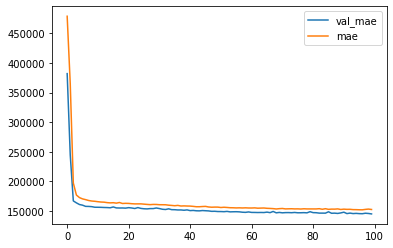

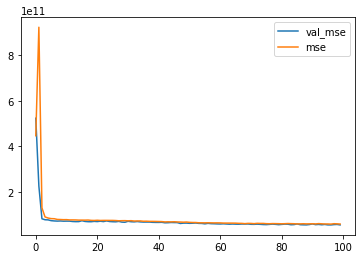

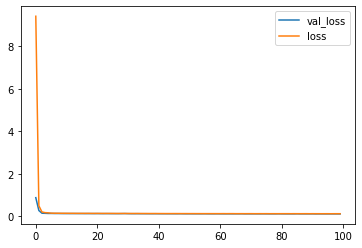

In [12]:
losses = pd.DataFrame(model.history.history)
losses[['val_mae', 'mae']].plot()
losses[['val_mse', 'mse']].plot()
losses[['val_loss', 'loss']].plot()

# Make Predictions

Mean Absolute Error: 149573.6016438614
Mean Square Error: 244654.99367218025


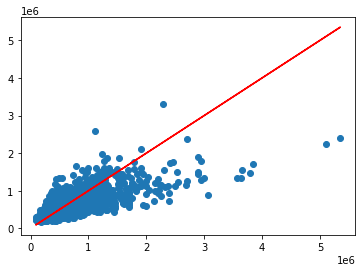

In [13]:
y_preds = model.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red')

print("Mean Absolute Error:", mean_absolute_error(y_test, y_preds))
print("Mean Square Error:", np.sqrt(mean_squared_error(y_test, y_preds)))

In [14]:
y_test.values

array([ 449950.,  485000., 2000000., ..., 2250000.,  285000.,  527000.])

In [15]:
loss_sum = 0
for i in range(10):
  rand_ind = random.sample(range(0, X_test.shape[0]), 3)
  X_test_sample = X_test.values[rand_ind]
  y_test_sample = y_test.values[rand_ind]
  loss, mae, mse = model.evaluate(X_test_sample, y_test_sample, verbose=2)
  loss_sum += loss

loss_sum / 10

1/1 - 0s - loss: 0.0721 - mae: 137574.1094 - mse: 37568163840.0000
1/1 - 0s - loss: 0.0308 - mae: 66927.8047 - mse: 5094172672.0000
1/1 - 0s - loss: 0.0308 - mae: 87641.0000 - mse: 10606926848.0000
1/1 - 0s - loss: 0.0503 - mae: 75570.8828 - mse: 7972781568.0000
1/1 - 0s - loss: 0.0404 - mae: 94573.8984 - mse: 9748882432.0000
1/1 - 0s - loss: 0.0652 - mae: 95708.6484 - mse: 9874495488.0000
1/1 - 0s - loss: 0.1092 - mae: 106503.6484 - mse: 12299747328.0000
1/1 - 0s - loss: 0.0467 - mae: 80668.3125 - mse: 6768341504.0000
1/1 - 0s - loss: 0.0557 - mae: 91069.4453 - mse: 11423600640.0000
1/1 - 0s - loss: 0.2161 - mae: 162531.7969 - mse: 41816195072.0000


0.07174103930592537